In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Train'
valid_path = '/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Test'

In [3]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Train/*')

In [6]:
folders

['/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Train/Parasite',
 '/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Train/Uninfected']

In [7]:
# our layers -can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

#sigmoid is used for binary classification here i will be using 2 nodes so used softmax

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

# OR Create Model from scratch using CNN

In [11]:
model.compile(
              loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [14]:
training_set

In [15]:
test_set = test_datagen.flow_from_directory('/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [16]:
len(training_set)

13

In [17]:
len(test_set)

5

In [18]:
history = model.fit_generator(
                              training_set,
                              validation_data=test_set,
                              epochs=5,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set)
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
13/13 [==============================] - 195s 15s/step - loss: 1.5157 - accuracy: 0.5337 - val_loss: 1.6312 - val_accuracy: 0.3358
Epoch 2/5
13/13 [==============================] - 178s 14s/step - loss: 0.6716 - accuracy: 0.6514 - val_loss: 0.5645 - val_accuracy: 0.6866
Epoch 3/5
13/13 [==============================] - 185s 14s/step - loss: 0.4959 - accuracy: 0.7548 - val_loss: 0.8550 - val_accuracy: 0.5522
Epoch 4/5
13/13 [==============================] - 201s 15s/step - loss: 0.4358 - accuracy: 0.8029 - val_loss: 0.5233 - val_accuracy: 0.7015
Epoch 5/5
13/13 [==============================] - 195s 15s/step - loss: 0.3642 - accuracy: 0.8365 - val_loss: 0.5315 - val_accuracy: 0.7239


Train-->folders-- Parasite first--0, Uninfected second folder--1.

Train for more epochs

<Figure size 432x288 with 0 Axes>

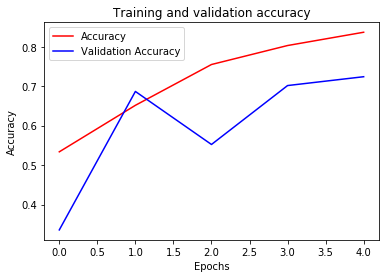

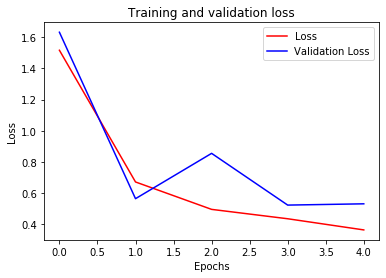

<Figure size 432x288 with 0 Axes>

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.figure()

In [20]:
from tensorflow.keras.models import load_model

model.save('malaria_model_vgg19.h5')

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Final_check/datasets-87153-200743-cell_images-Parasitized-C100P61ThinF_IMG_20150918_144104_cell_162.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

Using TensorFlow backend.


{'Parasite': 0, 'Uninfected': 1}

In [23]:
print('cell image is : ', result)

cell image is :  [[1. 0.]]


In [24]:
test_image.shape

(1, 224, 224, 3)

In [25]:
a=np.argmax(model.predict(test_image),axis=1)

In [26]:
a

array([0])

In [27]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


In [28]:
test_image = image.load_img('/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Final_check/datasets-87153-200743-cell_images-Uninfected-C100P61ThinF_IMG_20150918_144823_cell_126.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [29]:
print('cell image is : ', result)

cell image is :  [[0.9264813  0.07351878]]


In [30]:
test_image.shape

(1, 224, 224, 3)

In [31]:
a=np.argmax(model.predict(test_image),axis=1)

In [32]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


In [39]:
test_image = image.load_img('/Users/pranavkalikate/Desktop/ALGO/Malaria_Dataset/Final_check/datasets-87153-200743-cell_images-Parasitized-C100P61ThinF_IMG_20150918_145042_cell_162.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
print('cell image is : ', result)

cell image is :  [[1. 0.]]


In [40]:
a=np.argmax(model.predict(test_image),axis=1)
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
